In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_5776\1244458251.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Borrar columnas innecesarias
# describe()
# Max, min, std
alt = pd.read_csv("alturas.csv")

In [4]:
alt.head()
alt.drop(columns=["Unnamed: 0.1",	"Unnamed: 0"], inplace=True)

In [5]:
alt.head()

,esp,por,swe,fra
0,148.785669,132.310802,171.078003,149.357188
1,131.931630,153.214966,172.762519,169.872371
2,191.057791,206.041381,181.082132,157.568242
3,190.935714,193.306879,234.199745,157.811687
4,160.676666,126.244244,207.681445,167.986754


In [6]:
alt.describe()

,esp,por,swe,fra
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,170.120040,164.585743,182.446293,170.059354
std,19.915349,24.710109,24.919607,20.280489
min,96.737075,78.860028,86.022559,78.806492
25%,156.657101,147.925539,165.320591,156.544134
50%,170.377533,164.534573,182.654178,169.837293
75%,183.614256,181.044152,199.405632,183.697008
max,259.036674,257.490308,274.217179,255.856842


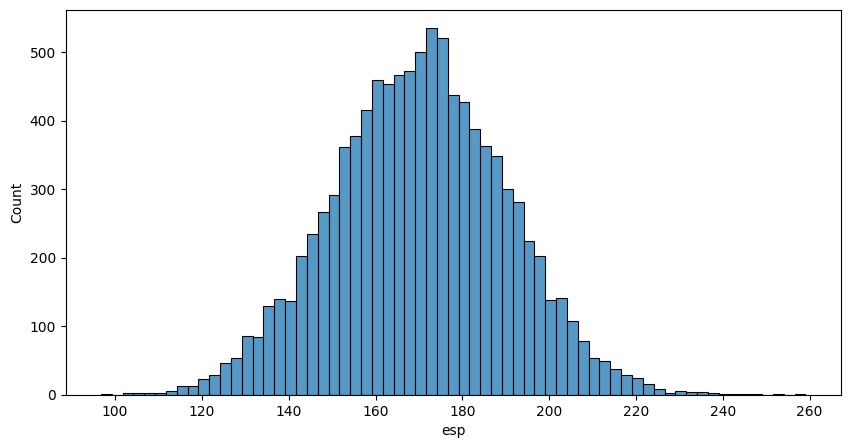

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(alt['esp']);


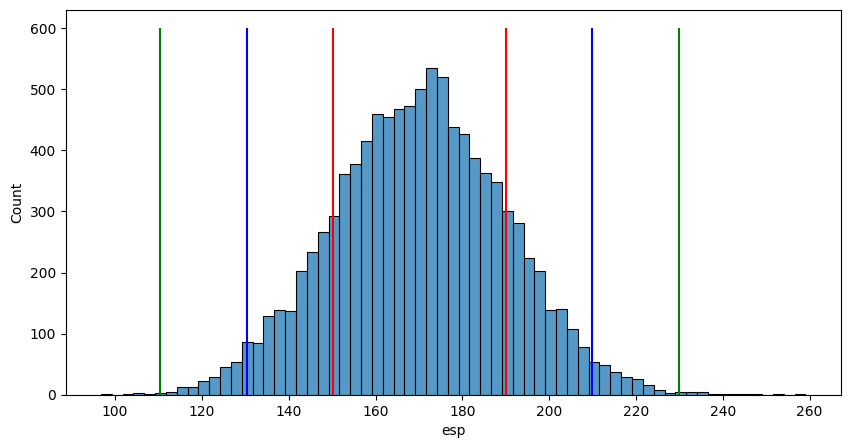

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(alt['esp']);

plt.vlines(alt['esp'].mean()+alt['esp'].std(), 0, 600, colors="r")
plt.vlines(alt['esp'].mean()-alt['esp'].std(), 0, 600,colors="r")


plt.vlines(alt['esp'].mean()+2*alt['esp'].std(), 0, 600, colors="b")
plt.vlines(alt['esp'].mean()-2*alt['esp'].std(), 0, 600,colors="b")

plt.vlines(alt['esp'].mean()+3*alt['esp'].std(), 0, 600, colors="g")
plt.vlines(alt['esp'].mean()-3*alt['esp'].std(), 0, 600,colors="g")

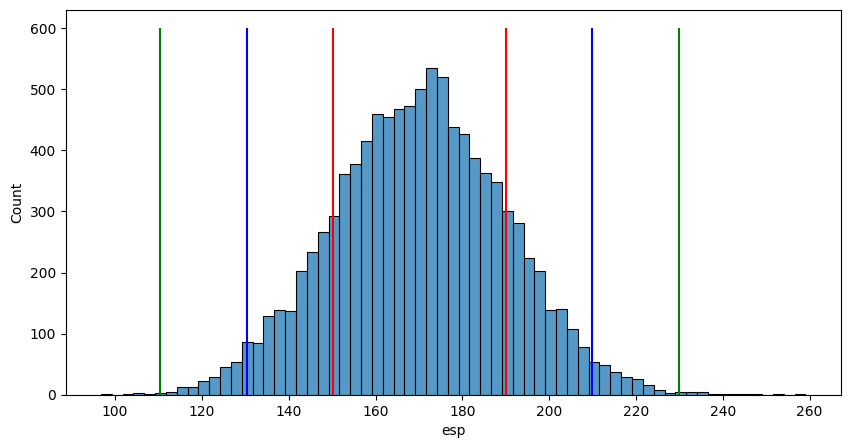

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(alt['esp']);

c = ["r", "b", "g"]
n = [1,2,3]

for r in range(3):
    plt.vlines(alt['esp'].mean()+n[r]*alt['esp'].std(), 0, 600, colors=c[r])
    plt.vlines(alt['esp'].mean()-n[r]*alt['esp'].std(), 0, 600,colors=c[r])
    

![imagen](normal.jpg)

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(alt['esp']);

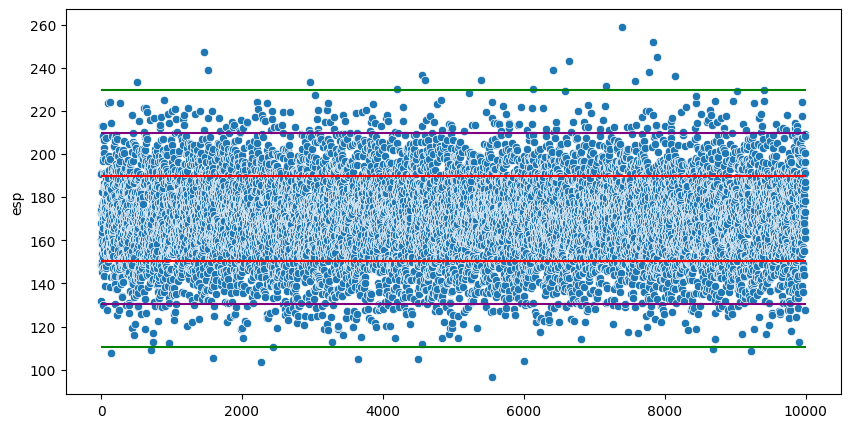

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(alt['esp']);
plt.hlines(alt['esp'].mean()+alt['esp'].std(), 0, 10000, colors="r")
plt.hlines(alt['esp'].mean()-alt['esp'].std(), 0, 10000,colors="r")

plt.hlines(alt['esp'].mean()+2*alt['esp'].std(), 0, 10000, colors="purple")
plt.hlines(alt['esp'].mean()-2*alt['esp'].std(), 0, 10000,colors="purple")

plt.hlines(alt['esp'].mean()+3*alt['esp'].std(), 0, 10000, colors="g")
plt.hlines(alt['esp'].mean()-3*alt['esp'].std(), 0, 10000,colors="g")

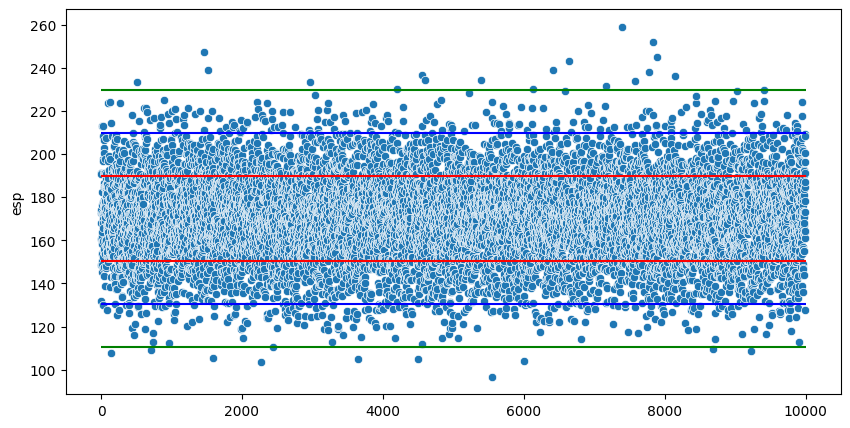

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(alt['esp']);

c = ["r", "b", "g"]
n = [1,2,3]

for r in range(3):
    plt.hlines(alt['esp'].mean()+n[r]*alt['esp'].std(), 0, 10000, colors=c[r])
    plt.hlines(alt['esp'].mean()-n[r]*alt['esp'].std(), 0, 10000,colors=c[r])

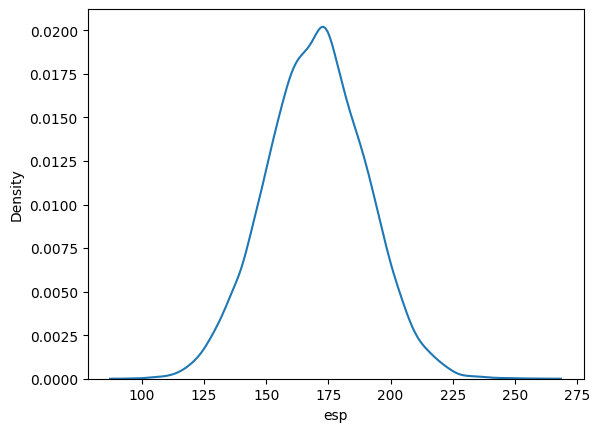

In [11]:
sns.kdeplot(alt['esp']);

<Figure size 50000x20000 with 0 Axes>

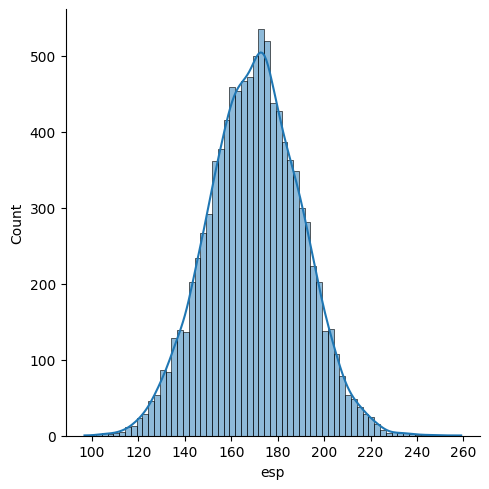

In [16]:
plt.figure(figsize=(500,200))
sns.displot(data=alt, x="esp", kde=True)

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_5776\2857856248.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(alt['esp'], shade=True);


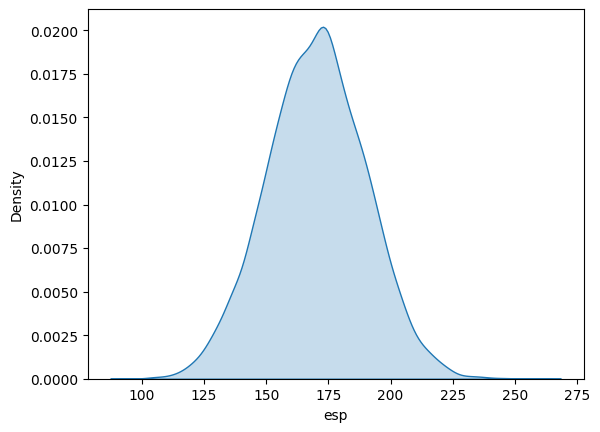

In [17]:
sns.kdeplot(alt['esp'], shade=True);

In [88]:
# Supongamos que en lugar de conseguir la altura de las 10.000 personas solo tenemos una muestra de 10, 30, 50, 300 personas... (muestra)
# ¿Cómo podemos estimar la media y varianza de ese grupo de 10.000 personas (población) 
# Varianza a "mano" vs .std
np.random.seed(42)
samples = []
samples_ = []
for _ in range(1000):
    muestra = alt['esp'].sample(50)
    samples.append(abs(muestra.mean() -alt['esp'].mean()))

    min_max = (muestra.max() + muestra.min())/2
    samples_.append(abs(min_max-alt['esp'].mean()))

In [91]:
np.random.seed(42)
muestra = alt['esp'].sample(10)

In [92]:
muestra.std()

13.049808055568278

In [93]:
muestra.std(ddof=0)

12.380134945082675

In [80]:
import math 
math.sqrt(sum((alt['esp'] - alt['esp'].mean())**2)/10000)

19.914352919951035

In [82]:
math.sqrt(sum((alt['esp'] - alt['esp'].mean())**2)/9999)

19.915348712282082

In [81]:
alt['esp'].std()

19.915348712282082

In [85]:
alt['esp'].std(ddof=0)

19.914352919951035

In [66]:
s = np.array(samples)
s_ = np.array(samples_)

In [68]:
len(s_[s>s_])

243

In [100]:
np.random.seed(42)
muestra = alt['esp'].sample(300)

In [101]:
np.random.seed(42)
from scipy.stats import ttest_1samp
ttest_1samp(muestra, alt['esp'].mean())

TtestResult(statistic=0.14423790942438072, pvalue=0.8854097756482217, df=299)

In [102]:
np.random.seed(1100)
from scipy.stats import ttest_1samp
ttest_1samp([216, 214, 216], alt['esp'].mean())

TtestResult(statistic=67.81993992103126, pvalue=0.0002173419678840807, df=2)

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_5776\4190434125.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(alt[['por', 'swe']], shade=True);


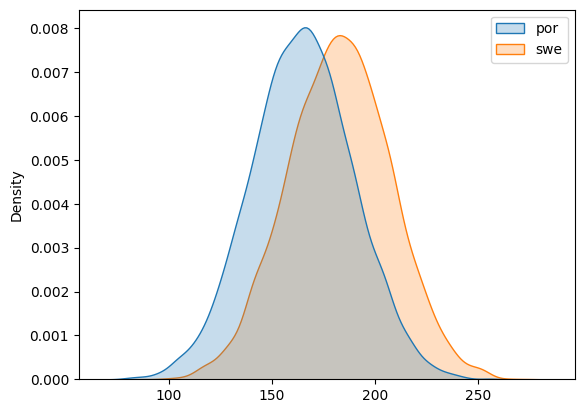

In [104]:
sns.kdeplot(alt[['por', 'swe']], shade=True);

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_5776\3301886054.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(alt[['fra', 'esp']], shade=True);


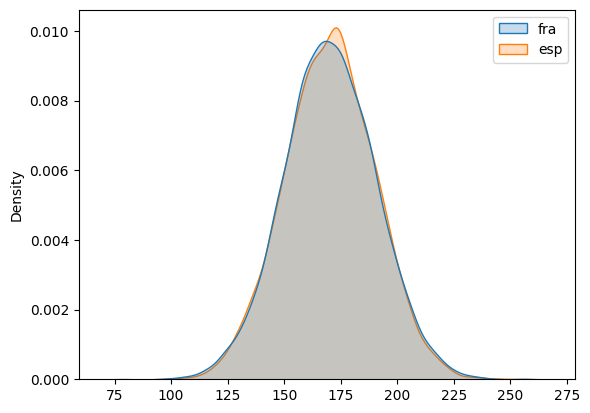

In [106]:
sns.kdeplot(alt[['fra', 'esp']], shade=True);

In [108]:
from scipy.stats import ttest_ind
ttest_ind(alt['swe'], alt['por'],  equal_var=False)

TtestResult(statistic=50.89371770735865, pvalue=0.0, df=19996.57479707426)

In [110]:
from scipy.stats import ttest_ind
ttest_ind(alt['esp'], alt['fra'],  equal_var=False)

TtestResult(statistic=0.21350474265379696, pvalue=0.8309354675162894, df=19991.402357660834)